In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("merc_train.csv")
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv("merc_test.csv")
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df_train.describe(include="all")

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209,4209,4209,4209,4209,4209,4209,4209,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
unique,NaN,NaN,47,27,44,7,4,29,12,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,z,aa,as,c,d,w,g,j,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,360,833,1659,1942,4205,231,1042,277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4205.960798,100.669318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
cols_tr = df_train.columns
cols_tr

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [6]:
# Columns with zero variability in train dataset
col_nv = []
for k in cols_tr:
    var = len(df_train[k].unique())
    if var==1:
        col_nv.append(k)
        print(k)
        print(var)
    

X11
1
X93
1
X107
1
X233
1
X235
1
X268
1
X289
1
X290
1
X293
1
X297
1
X330
1
X347
1


In [7]:
df_train=df_train.drop(col_nv,axis=1)
df_train.shape

(4209, 366)

In [8]:
# Check for null and unique values for train dataset
col_nl = []
for i in range(0,366):
    if df_train.isnull().sum()[i]!=0:
        col_nl.append(i)

if len(col_nl)>0:
    print("Column indexes with null values are: ",col_nl)
else:
    print("No columns with NULL values in Train dataset")

No columns with NULL values in Train dataset


##### Changing categorical type columns to numerical using LABEL ENCODER

In [9]:
cat_cols= df_train.select_dtypes(include=['object']).columns.values
cat_cols

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [10]:
df_train_indv = df_train.drop(columns={'y','ID'})
df_train_dv = df_train['y']
print("Independent vars in train dataset:\n",df_train_indv.head(2),"\n\nDependent var in train dataset:")
df_train_dv.head(2)

Independent vars in train dataset:
   X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  ...  X375  X376  X377  X378  X379  X380  \
0  k  v  at  a  d  u  j  o    0    0  ...     0     0     1     0     0     0   
1  k  t  av  e  d  y  l  o    0    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  

[2 rows x 364 columns] 

Dependent var in train dataset:


0    130.81
1     88.53
Name: y, dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df_train_indv[cat_cols]

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [13]:
for i in cat_cols:
     df_train_indv[i] = le.fit_transform(df_train_indv[i])
 

In [14]:
df_train_indv[cat_cols]

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


##### DIMENSIONALITY REDUCTION

In [15]:
print("Independent var shape: ",df_train_indv.shape,"\nDependent var shape:",df_train_dv.shape)


Independent var shape:  (4209, 364) 
Dependent var shape: (4209,)


n is kept as less than 1 because the amount of variability we want from our dataset should not be compromised

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [17]:
df_train_indv_trans = pca.fit_transform(df_train_indv)


In [18]:
df_train_indv_trans.shape

(4209, 6)

#### XGBoost

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [20]:
train_x,test_x,train_y,test_y = train_test_split(df_train_indv_trans, df_train_dv , test_size=.3, random_state=7)
print("Independent var from train dataset shape: ",train_x.shape)
print("Dependent var from train dataset shape: ",train_y.shape)
print("Independent var from test dataset shape: ",test_x.shape)
print("Dependent var from test dataset shape: ",test_y.shape)

Independent var from train dataset shape:  (2946, 6)
Dependent var from train dataset shape:  (2946,)
Independent var from test dataset shape:  (1263, 6)
Dependent var from test dataset shape:  (1263,)


In [21]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.3, max_depth = 10, 
                           n_estimators = 10, alpha=5)

model = xgb_reg.fit(train_x,train_y)
y_pred = model.predict(test_x)
print('RMSE = ',sqrt(mean_squared_error(y_pred,test_y)))

RMSE =  11.983889379633931


In [22]:
import warnings
warnings.filterwarnings('ignore')

##### Hyperparamters TUNING using GridSearchCV()

In [23]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1, 0.2, 0.4],
           'n_estimators': [20, 50, 100],
           'colsample_bytree': [0.3, 0.7]}

xgb_reg = xgb.XGBRegressor(seed = 10)

clf = GridSearchCV(estimator=xgb_reg, param_grid=params, scoring='neg_mean_squared_error', verbose=1)

clf.fit(train_x, train_y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Lowest RMSE:  9.937411389423373


In [24]:
# Prediction of test portion of Train dataset
y_pred = clf.predict(test_x)
print('RMSE = ',sqrt(mean_squared_error(y_pred,test_y)))

RMSE =  10.991240193647647


In [25]:
test_y.describe()

count    1263.000000
mean      101.039889
std        13.429557
min        72.500000
25%        90.890000
50%        99.560000
75%       108.995000
max       265.320000
Name: y, dtype: float64

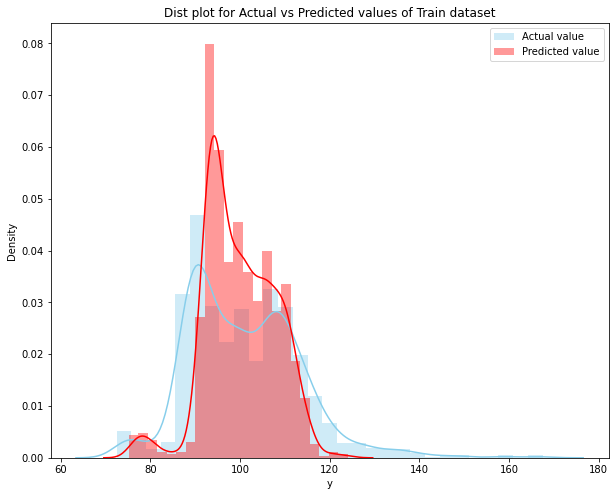

In [26]:
plt.figure(figsize=(10,8))

sns.distplot(test_y[test_y<=180], color="skyblue", label="Actual value")
sns.distplot(y_pred[y_pred<=180], color="red", label="Predicted value")
plt.title("Dist plot for Actual vs Predicted values of Train dataset")
plt.legend()


##### Prediction on Test dataset using XGBoost model

In [27]:
# TEST DATA PRE-PROCESSING

# Removing columns with zero variance
df_test = df_test.drop(col_nv,axis=1)  
df_test.shape

(4209, 365)

In [28]:
# Check for null and unique values for test dataset
col_nl = []
for i in range(0,365):
    if df_test.isnull().sum()[i]!=0:
        col_nl.append(i)

if len(col_nl)>0:
    print("Column indexes with null values are: ",col_nl)
else:
    print("No columns with NULL values in Test dataset")

No columns with NULL values in Test dataset


In [29]:
# Label encoder
cat_cols= df_test.select_dtypes(include=['object']).columns.values
cat_cols

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [30]:
df_test_indv = df_test.drop(columns={'ID'})
print("Independent vars in test dataset:\n")
df_test_indv.head(2)

Independent vars in test dataset:



,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
df_test_indv[cat_cols]

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [32]:
for i in cat_cols:
    df_test_indv[i] = le.fit_transform(df_test_indv[i])

df_test_indv[cat_cols]

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4
4205,42,1,8,3,3,1,9,24
4206,47,23,17,5,3,1,3,22
4207,7,23,17,0,3,1,2,16


In [33]:
# Dimensionality reduction
pca.fit(df_test_indv)
df_test_indv_trans = pca.fit_transform(df_test_indv)
df_test_indv_trans.shape

(4209, 6)

In [34]:
test_pred = clf.predict(df_test_indv_trans)
test_pred

array([ 81.20184 ,  94.61468 ,  80.90818 , ...,  99.669395, 107.267166,
        94.70761 ], dtype=float32)

Text(0.5, 1.0, 'Dist plot for predicted values of Test dataset')

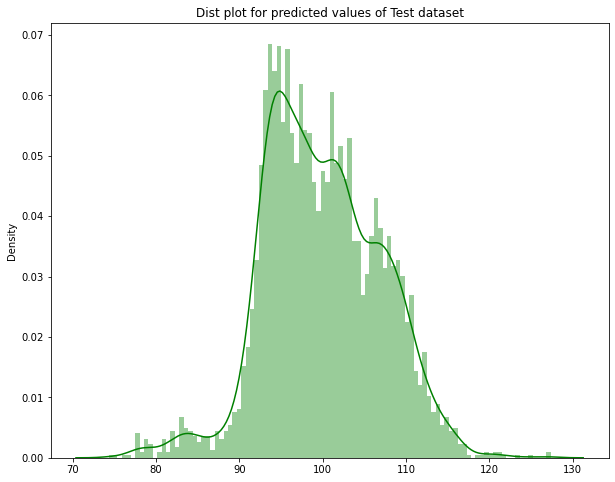

In [35]:
plt.figure(figsize=(10,8))

sns.distplot(test_pred[test_pred<=180], color="green", bins=100, kde=True)
plt.title("Dist plot for predicted values of Test dataset")
